In [2]:
import os

In [3]:
!pwd


/Users/martapiscitelli/Analisi_tesi/IRAS_13224-3809


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
cmap = plt.get_cmap('Set3')
cmap2 = plt.get_cmap('Set1')

IRAS 13224-3809 is a Narrow line Seyfert 1, this source has been widely observed in the past years, mainly because of its high variability and its relative proximity compared to other sources.\
In the following analysis I reported all the observations carried out with the XRT telescope in the Swift satellite. The observations are sampled in five different campaigns.\
All data were downloaded from the Swift website (https://www.swift.ac.uk)

In [6]:
#importing data 
lcurve1=pd.read_csv('build/plot_345970-1.cvs',
encoding='latin-1',
    sep=";"
)
print(lcurve1)
print("\n")
lcurve2=pd.read_csv('build/plot_819580-1.cvs',
encoding='latin-1',
    sep=";"
)
print(lcurve2)

print("\n")
lcurve3=pd.read_csv('build/plot_903940-1.cvs',
encoding='latin-1',
    sep=";"
)
print(lcurve3)

print("\n")
lcurve4=pd.read_csv('build/plot_916350-1.cvs',
encoding='latin-1',
    sep=";"
)
print(lcurve4)

print("\n")
lcurve5=pd.read_csv('build/plot_960520-1.cvs',
encoding='latin-1',
    sep=";"
)
print(lcurve5)


       Time  time_err  0.3-1.5keV  0.3-1.5keV_err  1.5-10keV  1.5-10keV_err  \
0   2287.59  0.070694    0.094452        0.007342   0.015703       0.003011   
1   2291.34  0.169178    0.157264        0.010393   0.024009       0.004254   
2   2292.08  0.433403    0.104382        0.009079   0.009656       0.002804   
3   2293.01  0.242859    0.195584        0.015051   0.020040       0.004910   
4   2294.78  0.001875    0.060268        0.015398   0.003302       0.003987   
5   2297.04  0.068912    0.033035        0.004587   0.001462       0.001098   
6   2297.67  0.036701    0.057294        0.007129   0.008348       0.002742   
7   2298.76  0.070046    0.114828        0.011220   0.010100       0.003421   
8   2300.37  0.002558    0.061520        0.015751   0.003134       0.003736   
9   2301.95  0.345845    0.120237        0.008695   0.008074       0.002325   
10  2303.22  0.073762    0.310580        0.018355   0.043757       0.006964   
11  2304.53  0.072824    0.127225        0.009927   

In [7]:
#
frames = [lcurve1, lcurve2, lcurve3,lcurve4,lcurve5]
result = pd.concat(frames)

In [8]:
lcurve1.columns


Index(['Time', 'time_err', '0.3-1.5keV', '0.3-1.5keV_err', '1.5-10keV',
       '1.5-10keV_err', 'HR', 'HR_err', 'ID'],
      dtype='object')

In [9]:
lcurve2.columns

Index(['Time', 'time_err', '0.3-1.5keV', '0.3-1.5keV_err', '1.5-10keV',
       '1.5-10keV_err', 'HR', 'HR_err', 'ID'],
      dtype='object')

In [10]:
lcurve3.columns

Index(['Time', 'time_err', '0.3-1.5keV', '0.3-1.5keV_err', '1.5-10keV',
       '1.5-10keV_err', 'HR', 'HR_err', 'ID'],
      dtype='object')

In [11]:
lcurve4.columns

Index(['Time', 'time_err', '0.3-1.5keV', '0.3-1.5keV_err', '1.5-10keV',
       '1.5-10keV_err', 'HR', 'HR_err', 'ID'],
      dtype='object')

In [12]:
lcurve5.columns

Index(['Time', 'time_err', '0.3-1.5keV', '0.3-1.5keV_err', '1.5-10keV',
       '1.5-10keV_err', 'HR', 'HR_err', 'ID'],
      dtype='object')

In [13]:
#column for normalized hardness ratio on total counts.
lcurve1['H-S/H+S']  = (lcurve1['1.5-10keV'] - lcurve1['0.3-1.5keV']) / (lcurve1['1.5-10keV'] + lcurve1['0.3-1.5keV'])
lcurve2['H-S/H+S']  = (lcurve2['1.5-10keV'] - lcurve2['0.3-1.5keV']) / (lcurve2['1.5-10keV'] + lcurve2['0.3-1.5keV'])
lcurve3['H-S/H+S']  = (lcurve3['1.5-10keV'] - lcurve3['0.3-1.5keV']) / (lcurve3['1.5-10keV'] + lcurve3['0.3-1.5keV'])
lcurve4['H-S/H+S']  = (lcurve4['1.5-10keV'] - lcurve4['0.3-1.5keV']) / (lcurve4['1.5-10keV'] + lcurve4['0.3-1.5keV'])
lcurve5['H-S/H+S']  = (lcurve5['1.5-10keV'] - lcurve5['0.3-1.5keV']) / (lcurve5['1.5-10keV'] + lcurve5['0.3-1.5keV'])

In [14]:
#single terms for error propagation
a_err = ((2*lcurve1['0.3-1.5keV'])/((lcurve1['0.3-1.5keV'] + lcurve1['1.5-10keV'])**2)*(lcurve1['1.5-10keV_err']))
b_err = ((2*lcurve1['1.5-10keV'])/((lcurve1['0.3-1.5keV'] + lcurve1['1.5-10keV'])**2)*(lcurve1['0.3-1.5keV_err']))

a_err2 = ((2*lcurve2['0.3-1.5keV'])/((lcurve2['0.3-1.5keV'] + lcurve2['1.5-10keV'])**2)*(lcurve2['1.5-10keV_err']))
b_err2 = ((2*lcurve2['1.5-10keV'])/((lcurve2['0.3-1.5keV'] + lcurve2['1.5-10keV'])**2)*(lcurve2['0.3-1.5keV_err']))

a_err3 = ((2*lcurve3['0.3-1.5keV'])/((lcurve3['0.3-1.5keV'] + lcurve3['1.5-10keV'])**2)*(lcurve3['1.5-10keV_err']))
b_err3 = ((2*lcurve3['1.5-10keV'])/((lcurve3['0.3-1.5keV'] + lcurve3['1.5-10keV'])**2)*(lcurve3['0.3-1.5keV_err']))

a_err4 = ((2*lcurve4['0.3-1.5keV'])/((lcurve4['0.3-1.5keV'] + lcurve4['1.5-10keV'])**2)*(lcurve4['1.5-10keV_err']))
b_err4 = ((2*lcurve4['1.5-10keV'])/((lcurve4['0.3-1.5keV'] + lcurve4['1.5-10keV'])**2)*(lcurve4['0.3-1.5keV_err']))

a_err5 = ((2*lcurve5['0.3-1.5keV'])/((lcurve5['0.3-1.5keV'] + lcurve5['1.5-10keV'])**2)*(lcurve5['1.5-10keV_err']))
b_err5 = ((2*lcurve5['1.5-10keV'])/((lcurve5['0.3-1.5keV'] + lcurve5['1.5-10keV'])**2)*(lcurve5['0.3-1.5keV_err']))

In [15]:
#taking the sum of squares, and defining the error columns
normHR_err = np.sqrt(a_err**2 + b_err**2)
lcurve1['normHR_err'] = normHR_err

normHR_err2 = np.sqrt(a_err2**2 + b_err2**2)
lcurve2['normHR_err'] = normHR_err2

normHR_err3 = np.sqrt(a_err3**2 + b_err3**2)
lcurve3['normHR_err'] = normHR_err3

normHR_err4 = np.sqrt(a_err4**2 + b_err4**2)
lcurve4['normHR_err'] = normHR_err4

normHR_err5 = np.sqrt(a_err5**2 + b_err5**2)
lcurve5['normHR_err'] = normHR_err5

In [16]:
#Selecting the zeroth-elemtent of the time matrix for each data set
lcurve1["Time"]
matrix = lcurve1.to_numpy()
t0 = matrix[0][0]
print(t0)
#t0 = 'Time'[1;1]

matrix2 = lcurve2.to_numpy()
t02 = matrix2[0][0]

matrix3 = lcurve3.to_numpy()
t03 = matrix3[0][0]

matrix4 = lcurve4.to_numpy()
t04 = matrix4[0][0]

matrix5 = lcurve5.to_numpy()
t05 = matrix5[0][0]
print(t03)

2287.59
4.15015


In [17]:
result_matrix = result.to_numpy
print(result_matrix)

<bound method DataFrame.to_numpy of        Time  time_err  0.3-1.5keV  0.3-1.5keV_err  1.5-10keV  1.5-10keV_err  \
0   2287.59  0.070694    0.094452        0.007342   0.015703       0.003011   
1   2291.34  0.169178    0.157264        0.010393   0.024009       0.004254   
2   2292.08  0.433403    0.104382        0.009079   0.009656       0.002804   
3   2293.01  0.242859    0.195584        0.015051   0.020040       0.004910   
4   2294.78  0.001875    0.060268        0.015398   0.003302       0.003987   
..      ...       ...         ...             ...        ...            ...   
0   1417.51  0.006631    0.179462        0.018268   0.014377       0.005447   
1   1442.35  0.098968    0.147509        0.007253   0.023357       0.002910   
2   1444.38  0.006457    0.033120        0.006311   0.003187       0.002032   
0   4080.04  0.007008    0.044248        0.007025   0.001945       0.001557   
1   4151.78  0.002235    0.146733        0.021915   0.021512       0.008516   

          HR   

In [18]:
#subtracting time-0 of the earliest campaign to all data sets. 
lcurve1['Time'] = lcurve1['Time'] - t03
lcurve2['Time'] = lcurve2['Time'] - t03
lcurve3['Time'] = lcurve3['Time'] - t03
lcurve4['Time'] = lcurve4['Time'] - t03
lcurve5['Time'] = lcurve5['Time'] - t03

#printing Time values in order to set boundaries for each campaign
lcurve1["Time"]

0     2283.43985
1     2287.18985
2     2287.92985
3     2288.85985
4     2290.62985
5     2292.88985
6     2293.51985
7     2294.60985
8     2296.21985
9     2297.79985
10    2299.06985
11    2300.37985
12    2300.81985
13    2302.21985
14    2304.80985
15    2308.54985
16    2313.01985
17    2314.30985
18    2314.76985
19    2316.82985
20    2318.09985
21    2318.85985
22    2320.05985
23    2320.42985
24    2324.40985
Name: Time, dtype: float64

In [19]:
lcurve2["Time"]



0    2284.40985
1    2286.73985
2    2307.82985
3    2309.45985
4    2314.16985
Name: Time, dtype: float64

In [20]:
lcurve3["Time"]

0       0.00000
1       3.67508
2       8.09605
3      12.32075
4      16.12755
        ...    
60    341.81285
61    344.15285
62    348.29985
63    352.21985
64    355.93585
Name: Time, Length: 65, dtype: float64

In [21]:
lcurve4["Time"]

0    1413.35985
1    1438.19985
2    1440.22985
Name: Time, dtype: float64

In [22]:
lcurve5["Time"]

0    4075.88985
1    4147.62985
Name: Time, dtype: float64

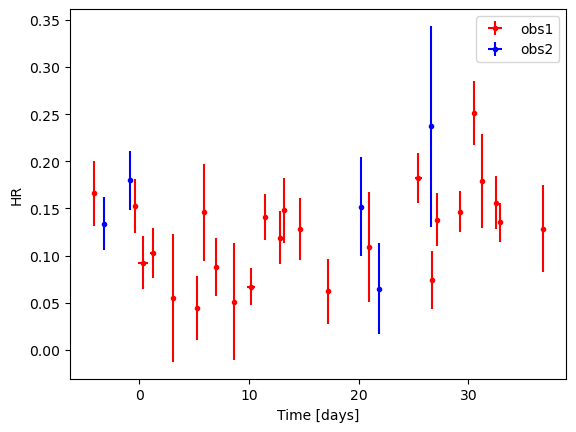

In [23]:
#Plotting HR for individual sets of observations
x1 = lcurve1['Time']
xerr1 = lcurve1['time_err']
y1 = lcurve1['HR']
yerr1 = lcurve1['HR_err']

plt.errorbar(lcurve1['Time']-t0,y1,xerr=xerr1,yerr=yerr1, color='r', marker='.', label='obs1', linestyle='None')


x2 = lcurve2['Time']
xerr2 = lcurve2['time_err']
y2 = lcurve2['HR']
yerr2 = lcurve2['HR_err']

plt.errorbar(lcurve2['Time']-t0, y2,xerr=xerr2,yerr=yerr2, color='b', marker='.', label='obs2',linestyle='None')


x3 = lcurve3['Time']
xerr3 = lcurve3['time_err']
y3 = lcurve3['HR']
yerr3 = lcurve3['HR_err']

#plt.errorbar(x3, y3,xerr=xerr3,yerr=yerr3, color='g', marker='.', label='obs3',linestyle='None')


plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('HR')
plt.show()

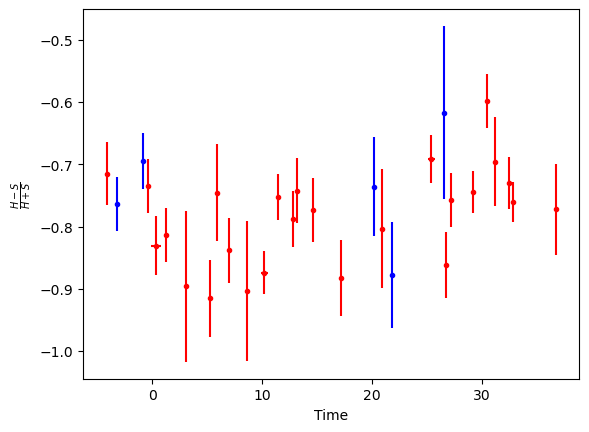

In [24]:
#Plotting normalized HR for individual sets of observations
# ! to set the origin of the x-axis in zero change the time vector, by subtracting the relevant t0 for each data set. 
plt.errorbar(lcurve2['Time']-t0, lcurve2['H-S/H+S'],xerr=lcurve2['time_err'],yerr=lcurve2['normHR_err'], color='b', marker='.', label='obs2',linestyle='None')
plt.errorbar(lcurve1['Time']-t0, lcurve1['H-S/H+S'],xerr=lcurve1['time_err'],yerr=lcurve1['normHR_err'], color='r', marker='.', label='obs2',linestyle='None')

plt.xlabel('Time')
plt.ylabel(r'$\frac{{H-S}}{{H+S}}$')
plt.savefig("plot/HR_vs_time_variability.pdf")
plt.show()

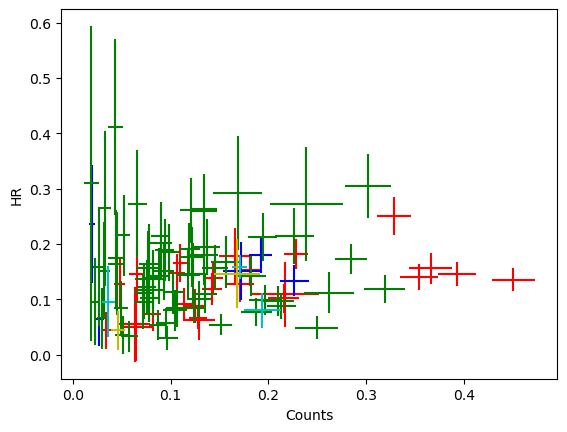

In [25]:
#Plotting HR as a function of counts for all observations
# c = H + S are counts and 'counts' is the error on counts
lcurve1['cts']  = (lcurve1['1.5-10keV'] + lcurve1['0.3-1.5keV'])
lcurve2['cts']  = (lcurve2['1.5-10keV'] + lcurve2['0.3-1.5keV'])
lcurve3['cts']  = (lcurve3['1.5-10keV'] + lcurve3['0.3-1.5keV'])
lcurve4['cts']  = (lcurve4['1.5-10keV'] + lcurve4['0.3-1.5keV'])
lcurve5['cts']  = (lcurve5['1.5-10keV'] + lcurve5['0.3-1.5keV'])

#computing the error on H+S
lcurve1['err_counts'] = np.sqrt(lcurve1['1.5-10keV_err']**2 + lcurve1['0.3-1.5keV_err']**2)
lcurve2['err_counts'] = np.sqrt(lcurve2['1.5-10keV_err']**2 + lcurve2['0.3-1.5keV_err']**2)
lcurve3['err_counts'] = np.sqrt(lcurve3['1.5-10keV_err']**2 + lcurve3['0.3-1.5keV_err']**2)
lcurve4['err_counts'] = np.sqrt(lcurve4['1.5-10keV_err']**2 + lcurve4['0.3-1.5keV_err']**2)
lcurve5['err_counts'] = np.sqrt(lcurve5['1.5-10keV_err']**2 + lcurve5['0.3-1.5keV_err']**2)


plt.errorbar(lcurve1['cts'],lcurve1['HR'],xerr=lcurve1['err_counts'],yerr=lcurve1['HR_err'], color='r', marker=',', linestyle='None')
plt.errorbar(lcurve2['cts'],lcurve2['HR'],xerr=lcurve2['err_counts'],yerr=lcurve2['HR_err'], color='b', marker=',', linestyle='None')
plt.errorbar(lcurve3['cts'],lcurve3['HR'],xerr=lcurve3['err_counts'],yerr=lcurve3['HR_err'], color='g', marker=',', linestyle='None')
plt.errorbar(lcurve4['cts'],lcurve4['HR'],xerr=lcurve4['err_counts'],yerr=lcurve4['HR_err'], color='c', marker=',', linestyle='None')
plt.errorbar(lcurve5['cts'],lcurve5['HR'],xerr=lcurve5['err_counts'],yerr=lcurve5['HR_err'], color='y', marker=',', linestyle='None')


plt.xlabel('Counts')
plt.ylabel('HR')
plt.show()

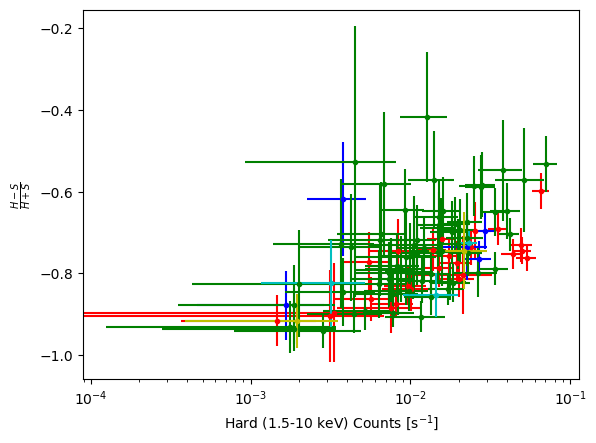

In [26]:
#Plotting normalized HR as a function of hard counts for all observations
    
plt.errorbar(lcurve1['1.5-10keV'],lcurve1['H-S/H+S'],xerr=lcurve1['1.5-10keV_err'],yerr=lcurve1['normHR_err'], color='r', marker='.', linestyle='None')
plt.errorbar(lcurve2['1.5-10keV'],lcurve2['H-S/H+S'],xerr=lcurve2['1.5-10keV_err'],yerr=lcurve2['normHR_err'], color='b', marker='.', linestyle='None')
plt.errorbar(lcurve3['1.5-10keV'],lcurve3['H-S/H+S'],xerr=lcurve3['1.5-10keV_err'],yerr=lcurve3['normHR_err'], color='g', marker='.', linestyle='None')
plt.errorbar(lcurve4['1.5-10keV'],lcurve4['H-S/H+S'],xerr=lcurve4['1.5-10keV_err'],yerr=lcurve4['normHR_err'], color='c', marker='.', linestyle='None')
plt.errorbar(lcurve5['1.5-10keV'],lcurve5['H-S/H+S'],xerr=lcurve5['1.5-10keV_err'],yerr=lcurve5['normHR_err'], color='y', marker='.', linestyle='None')

plt.xscale('log') 
#plt.xlabel('cts 1.5-10keV keV')
plt.xlabel('Hard (1.5-10 keV) Counts [s$^{-1}$]')
plt.ylabel(r'$\frac{{H-S}}{{H+S}}$')
plt.savefig("plot/HR_vs_hardcts.pdf")
plt.show()

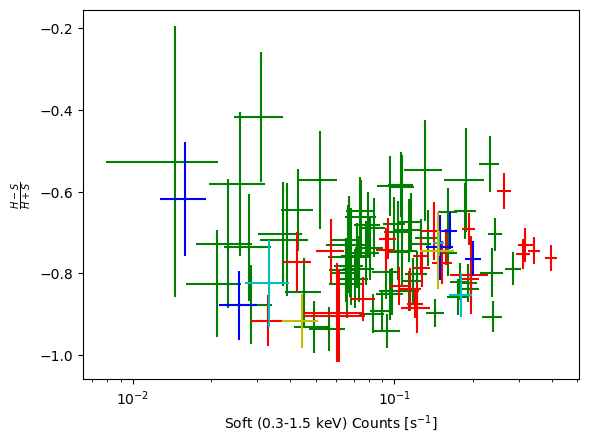

In [27]:
#Plotting normalized HR as a function of soft counts for all observations
plt.errorbar(lcurve3['0.3-1.5keV'],lcurve3['H-S/H+S'],xerr=lcurve3['0.3-1.5keV_err'],yerr=lcurve3['normHR_err'], color='g', marker=',', linestyle='None')
plt.errorbar(lcurve1['0.3-1.5keV'],lcurve1['H-S/H+S'],xerr=lcurve1['0.3-1.5keV_err'],yerr=lcurve1['normHR_err'], color='r', marker=',', linestyle='None')
plt.errorbar(lcurve2['0.3-1.5keV'],lcurve2['H-S/H+S'],xerr=lcurve2['0.3-1.5keV_err'],yerr=lcurve2['normHR_err'], color='b', marker=',', linestyle='None')
plt.errorbar(lcurve4['0.3-1.5keV'],lcurve4['H-S/H+S'],xerr=lcurve4['0.3-1.5keV_err'],yerr=lcurve4['normHR_err'], color='c', marker=',', linestyle='None')
plt.errorbar(lcurve5['0.3-1.5keV'],lcurve5['H-S/H+S'],xerr=lcurve5['0.3-1.5keV_err'],yerr=lcurve5['normHR_err'], color='y', marker=',', linestyle='None')

plt.xscale('log')
plt.xlabel('Soft (0.3-1.5 keV) Counts [s$^{-1}$]')
plt.ylabel(r'$\frac{{H-S}}{{H+S}}$')
plt.savefig("plot/HR_vs_softcts.pdf")
plt.show()

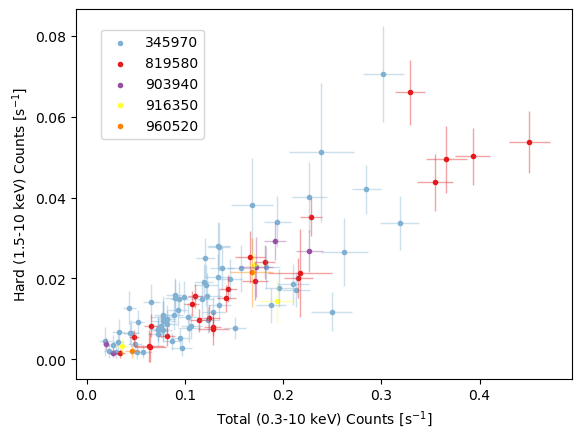

In [35]:
#hard cts v soft cts
plt.errorbar(lcurve3['cts'],lcurve3['1.5-10keV'],xerr=lcurve3['0.3-1.5keV_err'],yerr=lcurve3['1.5-10keV_err'], color=cmap(4) , marker=',', linestyle='None',linewidth =1,alpha = 0.4)
plt.scatter(lcurve3['cts'],lcurve3['1.5-10keV'], color=cmap(4) , marker='.', linestyle='None',linewidth =1,label = '345970')
plt.errorbar(lcurve1['cts'],lcurve1['1.5-10keV'],xerr=lcurve1['0.3-1.5keV_err'],yerr=lcurve1['1.5-10keV_err'], color=cmap2(0), marker=',', linestyle='None',linewidth =1,alpha = 0.4)
plt.scatter(lcurve1['cts'],lcurve1['1.5-10keV'], color=cmap2(0) , marker='.', linestyle='None',linewidth =1,label = '819580')
plt.errorbar(lcurve2['cts'],lcurve2['1.5-10keV'],xerr=lcurve2['0.3-1.5keV_err'],yerr=lcurve2['1.5-10keV_err'], color=cmap2(3), marker=',', linestyle='None',linewidth =1,alpha = 0.4)
plt.scatter(lcurve2['cts'],lcurve2['1.5-10keV'], color=cmap2(3) , marker='.', linestyle='None',linewidth =1,label = '903940')
plt.errorbar(lcurve4['cts'],lcurve4['1.5-10keV'],xerr=lcurve4['0.3-1.5keV_err'],yerr=lcurve4['1.5-10keV_err'], color=cmap2(5), marker=',', linestyle='None',linewidth =1,alpha = 0.4)
plt.scatter(lcurve4['cts'],lcurve4['1.5-10keV'], color=cmap2(5) , marker='.', linestyle='None',linewidth =1,label = '916350')
plt.errorbar(lcurve5['cts'],lcurve5['1.5-10keV'],xerr=lcurve5['0.3-1.5keV_err'],yerr=lcurve5['1.5-10keV_err'], color=cmap2(4), marker=',', linestyle='None',linewidth =1,alpha = 0.4)
plt.scatter(lcurve5['cts'],lcurve5['1.5-10keV'], color=cmap2(4) , marker='.', linestyle='None',linewidth =1,label = '960520')




# Legend setup
#handles, labels = ax.get_legend_handles_labels()

plt.legend(loc=(0.05,0.65))

# Label setup
plt.xlabel('Total (0.3-10 keV) Counts [s$^{-1}$]')
plt.ylabel('Hard (1.5-10 keV) Counts [s$^{-1}$]')
plt.savefig("plot/hardcts_vs_soft.pdf")
plt.show()

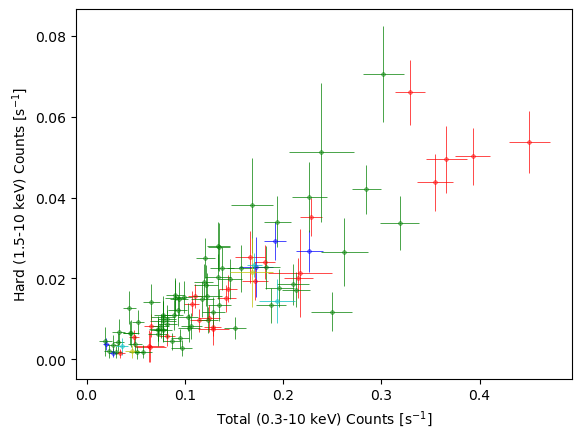

In [33]:
### hard cts v soft cts

plt.errorbar(lcurve1['cts'],lcurve1['1.5-10keV'],xerr=lcurve1['0.3-1.5keV_err'],yerr=lcurve1['1.5-10keV_err'], color='r', marker='.',markeredgewidth=0.5,markerfacecolor = 'none',ms = 5, linestyle='None',linewidth = 0.5)
plt.errorbar(lcurve2['cts'],lcurve2['1.5-10keV'],xerr=lcurve2['0.3-1.5keV_err'],yerr=lcurve2['1.5-10keV_err'], color='b', marker='.',markeredgewidth=0.5,markerfacecolor = 'none',ms = 5, linestyle='None',linewidth = 0.5)
plt.errorbar(lcurve3['cts'],lcurve3['1.5-10keV'],xerr=lcurve3['0.3-1.5keV_err'],yerr=lcurve3['1.5-10keV_err'], color='g', marker='.',markeredgewidth=0.5,markerfacecolor = 'none',ms = 5, linestyle='None',linewidth = 0.5)
plt.errorbar(lcurve4['cts'],lcurve4['1.5-10keV'],xerr=lcurve4['0.3-1.5keV_err'],yerr=lcurve4['1.5-10keV_err'], color='c', marker='.',markeredgewidth=0.5,markerfacecolor = 'none',ms = 5, linestyle='None',linewidth = 0.5)
plt.errorbar(lcurve5['cts'],lcurve5['1.5-10keV'],xerr=lcurve5['0.3-1.5keV_err'],yerr=lcurve5['1.5-10keV_err'], color='y', marker='.',markeredgewidth=0.5,markerfacecolor = 'none',ms = 5, linestyle='None',linewidth = 0.5)

plt.xlabel('Total (0.3-10 keV) Counts [s$^{-1}$]')
plt.ylabel('Hard (1.5-10 keV) Counts [s$^{-1}$]')
plt.savefig("plot/hardcts_vs_soft.pdf")
plt.show()

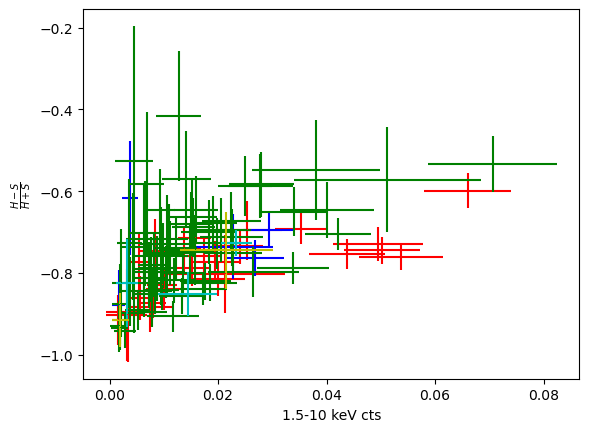

In [32]:
#HR vs hard cts
plt.errorbar(lcurve1['1.5-10keV'],lcurve1['H-S/H+S'],xerr=lcurve1['1.5-10keV_err'],yerr=lcurve1['normHR_err'], color='r', marker=',', linestyle='None')
plt.errorbar(lcurve2['1.5-10keV'],lcurve2['H-S/H+S'],xerr=lcurve2['1.5-10keV_err'],yerr=lcurve2['normHR_err'], color='b', marker=',', linestyle='None')
plt.errorbar(lcurve3['1.5-10keV'],lcurve3['H-S/H+S'],xerr=lcurve3['1.5-10keV_err'],yerr=lcurve3['normHR_err'], color='g', marker=',', linestyle='None')
plt.errorbar(lcurve4['1.5-10keV'],lcurve4['H-S/H+S'],xerr=lcurve4['1.5-10keV_err'],yerr=lcurve4['normHR_err'], color='c', marker=',', linestyle='None')
plt.errorbar(lcurve5['1.5-10keV'],lcurve5['H-S/H+S'],xerr=lcurve5['1.5-10keV_err'],yerr=lcurve5['normHR_err'], color='y', marker=',', linestyle='None')


plt.xlabel('1.5-10 keV cts')
plt.ylabel(r'$\frac{{H-S}}{{H+S}}$')
plt.show()

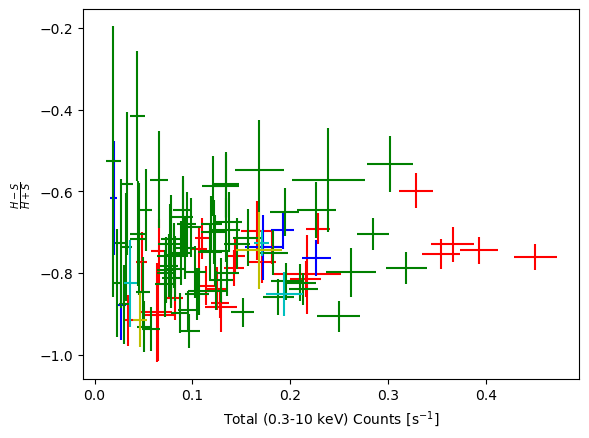

In [29]:
#Plotting normalized HR as a function of counts for all observations
    
plt.errorbar(lcurve1['cts'],lcurve1['H-S/H+S'],xerr=lcurve1['err_counts'],yerr=lcurve1['normHR_err'], color='r', marker=',', linestyle='None')
plt.errorbar(lcurve2['cts'],lcurve2['H-S/H+S'],xerr=lcurve2['err_counts'],yerr=lcurve2['normHR_err'], color='b', marker=',', linestyle='None')
plt.errorbar(lcurve3['cts'],lcurve3['H-S/H+S'],xerr=lcurve3['err_counts'],yerr=lcurve3['normHR_err'], color='g', marker=',', linestyle='None')
plt.errorbar(lcurve4['cts'],lcurve4['H-S/H+S'],xerr=lcurve4['err_counts'],yerr=lcurve4['normHR_err'], color='c', marker=',', linestyle='None')
plt.errorbar(lcurve5['cts'],lcurve5['H-S/H+S'],xerr=lcurve5['err_counts'],yerr=lcurve5['normHR_err'], color='y', marker=',', linestyle='None')


plt.xlabel('Total (0.3-10 keV) Counts [s$^{-1}$]')
plt.ylabel(r'$\frac{{H-S}}{{H+S}}$')
plt.savefig("plot/HR_vs_cts.pdf")
plt.show()

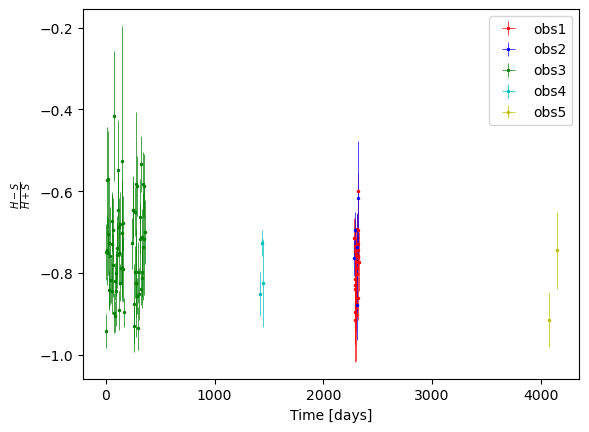

In [30]:
# Plotting normalized HR for all data sets together
x1 = lcurve1['Time']
xerr1 = lcurve1['time_err']
y1 = lcurve1['H-S/H+S']
yerr1 = lcurve1['normHR_err']

plt.errorbar(x1,y1,xerr=xerr1,yerr=yerr1, color='r', marker='.',markersize=3,linewidth=0.5, label='obs1', linestyle='None')
#plt.xscale('log')

x2 = lcurve2['Time']
xerr2 = lcurve2['time_err']
y2 = lcurve2['H-S/H+S']
yerr2 = lcurve2['normHR_err']

plt.errorbar(x2, y2,xerr=xerr2,yerr=yerr2, color='b', marker='.',markersize=3,linewidth=0.5, label='obs2',linestyle='None')

x3 = lcurve3['Time']
xerr3 = lcurve3['time_err']
y3 = lcurve3['H-S/H+S']
yerr3 = lcurve3['normHR_err']

plt.errorbar(x3, y3,xerr=xerr3,yerr=yerr3, color='g', marker='.',markersize=3,linewidth=0.5, label='obs3',linestyle='None')


x4 = lcurve4['Time']
xerr4 = lcurve4['time_err']
y4 = lcurve4['H-S/H+S']
yerr4 = lcurve4['normHR_err']

plt.errorbar(x4, y4,xerr=xerr4,yerr=yerr4, color='c', marker='.',markersize=3,linewidth=0.5, label='obs4',linestyle='None')

x5 = lcurve5['Time']
xerr5 = lcurve5['time_err']
y5 = lcurve5['H-S/H+S']
yerr5 = lcurve5['normHR_err']

plt.errorbar(x5, y5,xerr=xerr5,yerr=yerr5, color='y', marker='.',markersize=3,linewidth=0.5, label='obs5',linestyle='None')


plt.legend()
plt.xlabel('Time [days]')
plt.ylabel(r'$\frac{{H-S}}{{H+S}}$')
#plt.savefig("plot/LC_HR_tot.pdf")
plt.show()

In [31]:
#crating a big matrix with all data
finaldf = pd.concat([lcurve1,lcurve2,lcurve3,lcurve4,lcurve5])


Here the aim is to divide different observations according to their main features so that it is then possible to group them when constructing their spectra.\
We are interested in first place in dividing observations in these different classes: 
- hard counts
- soft counts
- bright (in total)
- faint (in total)
- soft faint
- hard faint


In [32]:
#only selecting observations with specific characteristics: soft, hard and bright 
finaldf_hard=finaldf.query('HR >= 0.255')
finaldf_soft=finaldf.query('HR <= 0.07')
finaldf_bright=finaldf.query('cts >= 0.22')
finaldf_faint=finaldf.query('cts <= 0.075')
finaldf_faint_soft=finaldf.query('`0.3-1.5keV` <= 0.06 and `H-S/H+S` <= -0.85')
finaldf_faint_hard=finaldf.query('`1.5-10keV` <= 0.02 and `H-S/H+S` >= -0.65')
finaldf_hard2=finaldf.query('`H-S/H+S` >= -0.65')
#printing the data relative to the selected observations, we are interested in recovering the ID to extract the spectra. 
print(finaldf_faint)
print(finaldf_faint['ID'])

          Time  time_err  0.3-1.5keV  0.3-1.5keV_err  1.5-10keV  \
4   2290.62985  0.001875    0.060268        0.015398   0.003302   
5   2292.88985  0.068912    0.033035        0.004587   0.001462   
6   2293.51985  0.036701    0.057294        0.007129   0.008348   
8   2296.21985  0.002558    0.061520        0.015751   0.003134   
24  2324.40985  0.038507    0.042624        0.005208   0.005472   
3   2309.45985  0.031145    0.025533        0.004228   0.001659   
4   2314.16985  0.036478    0.015891        0.003121   0.003766   
6     23.29275  0.006239    0.051810        0.008442   0.014137   
8     32.18235  0.005644    0.023108        0.005588   0.003653   
16    71.76595  0.032473    0.030964        0.006464   0.012752   
20    91.81605  0.006675    0.045341        0.007060   0.003804   
24   107.90385  0.037097    0.042871        0.006119   0.009245   
33   147.96985  0.005760    0.037396        0.007165   0.006517   
34   151.44785  0.007400    0.014520        0.006609   0.00450

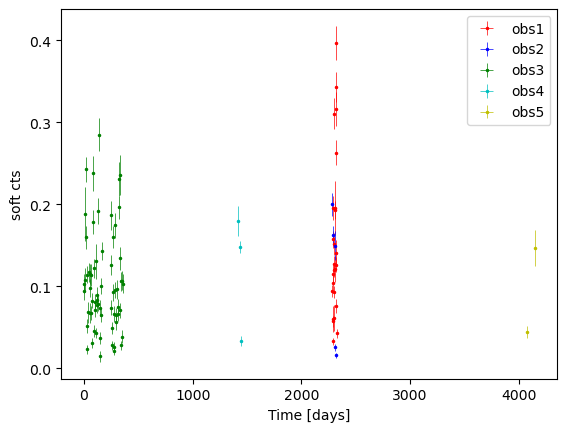

In [33]:
#Plotting soft cts vs Time non spined
x1 = lcurve1['Time']
xerr1 = lcurve1['time_err']
y1 = lcurve1['0.3-1.5keV']
yerr1 = lcurve1['0.3-1.5keV_err']

plt.errorbar(x1,y1,xerr=xerr1,yerr=yerr1, color='r', marker='.',markersize=3,linewidth=0.5, label='obs1', linestyle='None')
#plt.xscale('log')

x2 = lcurve2['Time']
xerr2 = lcurve2['time_err']
y2 = lcurve2['0.3-1.5keV']
yerr2 = lcurve2['0.3-1.5keV_err']

plt.errorbar(x2, y2,xerr=xerr2,yerr=yerr2, color='b', marker='.',markersize=3,linewidth=0.5, label='obs2',linestyle='None')

x3 = lcurve3['Time']
xerr3 = lcurve3['time_err']
y3 = lcurve3['0.3-1.5keV']
yerr3 = lcurve3['0.3-1.5keV_err']

plt.errorbar(x3, y3,xerr=xerr3,yerr=yerr3, color='g', marker='.',markersize=3,linewidth=0.5, label='obs3',linestyle='None')


x4 = lcurve4['Time']
xerr4 = lcurve4['time_err']
y4 = lcurve4['0.3-1.5keV']
yerr4 = lcurve4['0.3-1.5keV_err']

plt.errorbar(x4, y4,xerr=xerr4,yerr=yerr4, color='c', marker='.',markersize=3,linewidth=0.5, label='obs4',linestyle='None')

x5 = lcurve5['Time']
xerr5 = lcurve5['time_err']
y5 = lcurve5['0.3-1.5keV']
yerr5 = lcurve5['0.3-1.5keV_err']

plt.errorbar(x5, y5,xerr=xerr5,yerr=yerr5, color='y', marker='.',markersize=3,linewidth=0.5, label='obs5',linestyle='None')


plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('soft cts')
plt.show()

In [34]:
#reseparating the observations by time ranges
finaldf_filteredobs1=finaldf.query('Time < 400')
finaldf_filteredobs2=finaldf.query('1400 <= Time <1450')
#separating single observations for campaign 819580
finaldf_filteredobs3=finaldf.query('Time == 2284.40985')
finaldf_filteredobs6=finaldf.query('Time == 2286.73985')
finaldf_filteredobs7=finaldf.query('Time == 2307.82985')
finaldf_filteredobs8=finaldf.query('Time == 2309.45985')
finaldf_filteredobs9=finaldf.query('Time == 2314.16985')

finaldf_filteredobs4=finaldf.query('2250 <= Time <2350')
finaldf_filteredobs5=finaldf.query('4050 <= Time <4200')



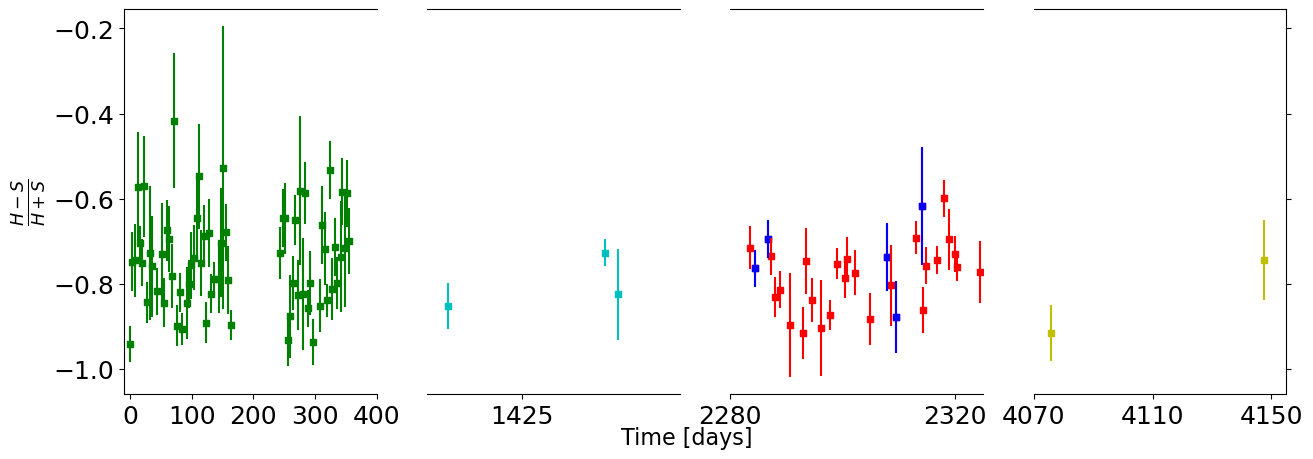

In [35]:
from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

ax1.yaxis.tick_left()
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')

ax2.xaxis.set_ticks(np.arange(1425,1430,40))
ax3.xaxis.set_ticks(np.arange(2280,2325,40))
ax4.xaxis.set_ticks(np.arange(4070,4200,40))

# removes the division line between subplots
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)

## removes x and y ticks 
##ax1.set_xticks(ax.get_xticks()[::1])
##ax2.set_xticks(ax.get_xticks()[::2])
##
##ax3.set_xticks(ax.get_xticks()[::2])
##
##ax4.set_xticks(ax.get_xticks()[::2])
##
#
##ax2.yaxis.set_ticks([])
##ax3.yaxis.set_ticks([])
#
#
##ax1.set_xlabel(labelcolor='none')
##ax2.yaxis.tick_right()
##ax3.yaxis.tick_right()


##setting x ranges (limits)
ax4.yaxis.tick_right()
ax1.set_xlim(-10,400) # most of the data
ax2.set_xlim(1410,1450) # outliers only
ax3.set_xlim(2280,2325) # outliers only
ax4.set_xlim(4070,4155) # outliers only
ax1.spines['right'].set_visible(False) 

#plotting data
ax = finaldf_filteredobs1.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="g" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
#removing the single labels under each suplot
ax.set_xlabel('')
#setting y label
ax.set_ylabel(r'$\frac{{H-S}}{{H+S}}$', fontsize=18)
ax =finaldf_filteredobs2.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="c" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs4.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs3.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs9.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs6.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs7.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs8.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs5.plot(x ='Time',xerr='time_err', y='H-S/H+S', yerr='normHR_err', marker=",",s=20, color="y" ,fontsize=18, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')

#setting a common xlabel and saving figure
fig.text(0.5, 0.01, 'Time [days]', ha='center', fontsize=16)
plt.savefig("plot/HR_vs_time_spines.pdf")


In [36]:
#add cts

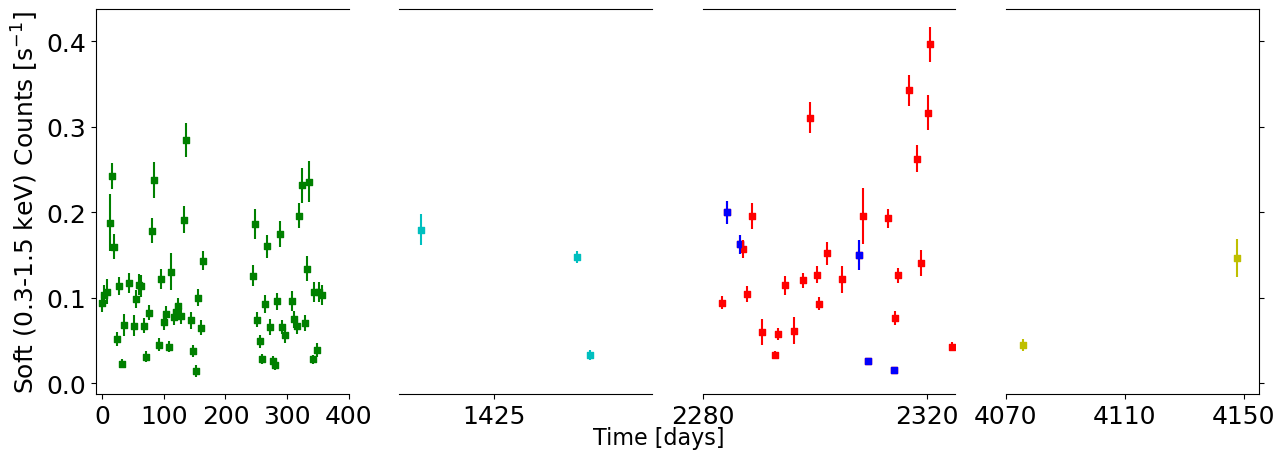

In [37]:
#softcts vs time
from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

ax1.yaxis.tick_left()
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')

ax2.xaxis.set_ticks(np.arange(1425,1430,40))
ax3.xaxis.set_ticks(np.arange(2280,2325,40))
ax4.xaxis.set_ticks(np.arange(4070,4200,40))

# removes the division line between subplots
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)

## removes x and y ticks 
##ax1.set_xticks(ax.get_xticks()[::1])
##ax2.set_xticks(ax.get_xticks()[::2])
##
##ax3.set_xticks(ax.get_xticks()[::2])
##
##ax4.set_xticks(ax.get_xticks()[::2])
##
#
##ax2.yaxis.set_ticks([])
##ax3.yaxis.set_ticks([])
#
#
##ax1.set_xlabel(labelcolor='none')
##ax2.yaxis.tick_right()
##ax3.yaxis.tick_right()


##setting x ranges (limits)
ax4.yaxis.tick_right()
ax1.set_xlim(-10,400) # most of the data
ax2.set_xlim(1410,1450) # outliers only
ax3.set_xlim(2280,2325) # outliers only
ax4.set_xlim(4070,4155) # outliers only
ax1.spines['right'].set_visible(False) 

#plotting data
ax = finaldf_filteredobs1.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="g" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
#removing the single labels under each suplot
ax.set_xlabel('')
#setting y label
ax.set_ylabel('Soft (0.3-1.5 keV) Counts [s$^{-1}$]', fontsize=18)
ax =finaldf_filteredobs2.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="c" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs4.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs3.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs9.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs6.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs7.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs8.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs5.plot(x ='Time',xerr='time_err', y='0.3-1.5keV', yerr='0.3-1.5keV_err', marker="s",s=20, color="y" ,fontsize=18, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')

#setting a common xlabel and saving figure
fig.text(0.5, 0.01, 'Time [days]', ha='center', fontsize=16)
plt.savefig("plot/softcts_spines.pdf")



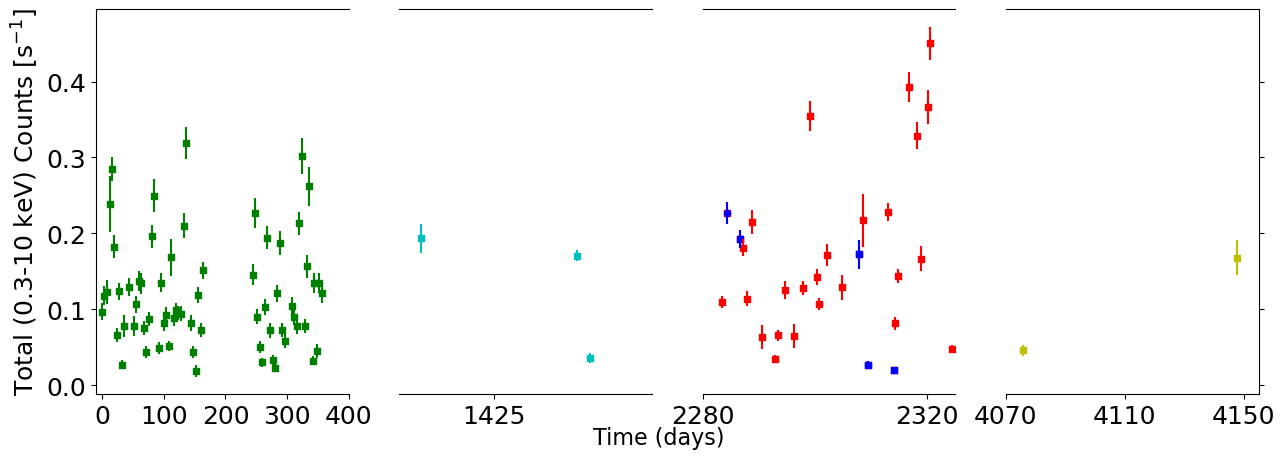

In [38]:
#cts vs time
from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

ax1.yaxis.tick_left()
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')

ax2.xaxis.set_ticks(np.arange(1425,1430,40))
ax3.xaxis.set_ticks(np.arange(2280,2325,40))
ax4.xaxis.set_ticks(np.arange(4070,4200,40))

# removes the division line between subplots
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)

## removes x and y ticks 
##ax1.set_xticks(ax.get_xticks()[::1])
##ax2.set_xticks(ax.get_xticks()[::2])
##
##ax3.set_xticks(ax.get_xticks()[::2])
##
##ax4.set_xticks(ax.get_xticks()[::2])
##
#
##ax2.yaxis.set_ticks([])
##ax3.yaxis.set_ticks([])
#
#
##ax1.set_xlabel(labelcolor='none')
##ax2.yaxis.tick_right()
##ax3.yaxis.tick_right()


##setting x ranges (limits)
ax4.yaxis.tick_right()
ax1.set_xlim(-10,400) # most of the data
ax2.set_xlim(1410,1450) # outliers only
ax3.set_xlim(2280,2325) # outliers only
ax4.set_xlim(4070,4155) # outliers only
ax1.spines['right'].set_visible(False) 

#plotting data
ax = finaldf_filteredobs1.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="g" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
#removing the single labels under each suplot
ax.set_xlabel('')
#setting y label
ax.set_ylabel('Total (0.3-10 keV) Counts [s$^{-1}$]', fontsize=18)
ax =finaldf_filteredobs2.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="c" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs4.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs3.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="o",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs9.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs6.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs7.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs8.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs5.plot(x ='Time',xerr='time_err', y='cts', yerr='err_counts', marker="s",s=20, color="y" ,fontsize=18, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')


#setting a common xlabel and saving figure
fig.text(0.5, 0.01, 'Time (days)', ha='center', fontsize=16)
plt.savefig("plot/cts_vs_time_spines.pdf")



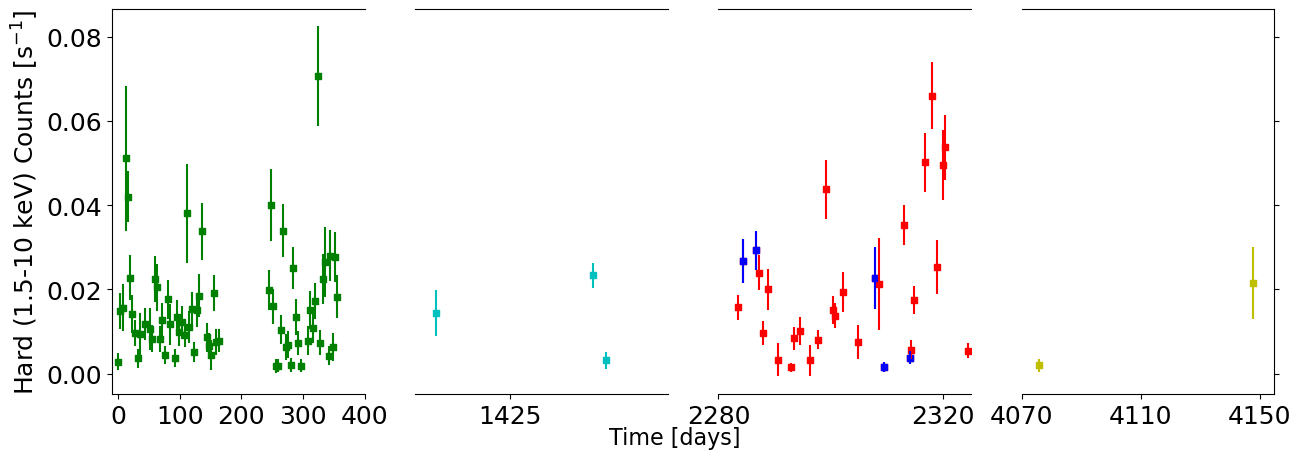

In [39]:
#hard cts vs counts
from matplotlib import cm
import matplotlib.gridspec as gridspec

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5), sharey=True)

ax1.yaxis.tick_left()
ax3.yaxis.set_ticks_position('none')
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')

ax2.xaxis.set_ticks(np.arange(1425,1430,40))
ax3.xaxis.set_ticks(np.arange(2280,2325,40))
ax4.xaxis.set_ticks(np.arange(4070,4200,40))

# removes the division line between subplots
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)

## removes x and y ticks 
##ax1.set_xticks(ax.get_xticks()[::1])
##ax2.set_xticks(ax.get_xticks()[::2])
##
##ax3.set_xticks(ax.get_xticks()[::2])
##
##ax4.set_xticks(ax.get_xticks()[::2])
##
#
##ax2.yaxis.set_ticks([])
##ax3.yaxis.set_ticks([])
#
#
##ax1.set_xlabel(labelcolor='none')
##ax2.yaxis.tick_right()
##ax3.yaxis.tick_right()


##setting x ranges (limits)
ax4.yaxis.tick_right()
ax1.set_xlim(-10,400) # most of the data
ax2.set_xlim(1410,1450) # outliers only
ax3.set_xlim(2280,2325) # outliers only
ax4.set_xlim(4070,4155) # outliers only
ax1.spines['right'].set_visible(False) 

#plotting data
ax = finaldf_filteredobs1.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="g" , fontsize=18,kind = 'scatter', ax=ax1, figsize=(15,5))
#removing the single labels under each suplot
ax.set_xlabel('')
#setting y label
ax.set_ylabel('Hard (1.5-10 keV) Counts [s$^{-1}$]', fontsize=18)
ax =finaldf_filteredobs2.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="c" ,fontsize=18, kind = 'scatter', ax=ax2, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs4.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="r" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs3.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs9.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs6.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs7.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax =finaldf_filteredobs8.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="b" ,fontsize=18, kind = 'scatter', ax=ax3, figsize=(15,5))
ax.set_xlabel('')
ax =finaldf_filteredobs5.plot(x ='Time',xerr='time_err', y='1.5-10keV', yerr='1.5-10keV_err', marker="s",s=20, color="y" ,fontsize=18, kind = 'scatter', ax=ax4, figsize=(15,5))
ax.set_xlabel('')

#setting a common xlabel and saving figure
fig.text(0.5, 0.01, 'Time [days]', ha='center', fontsize=16)
plt.savefig("plot/hardcts_spines.pdf")

